[73, 60, 61, 34]


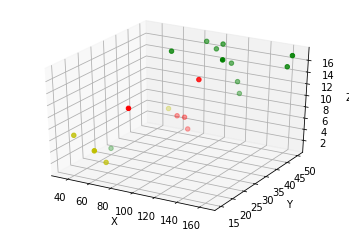

In [2]:
import math
import copy
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data_set=pd.read_csv("C:/Users/MY/Desktop/数据挖掘实验/实验4：聚类/WorldCup.csv",engine="python")
rank2019=list(data_set["2019Rank"])
rank2018=list(data_set["2018Rank"])
rank2015=list(data_set["2015Rank"])

print(rank2019[:4])
ax=plt.subplot(111,projection='3d')
ax.scatter(rank2019[:4],rank2018[:4],rank2015[:4],c='y') #前4个点
ax.scatter(rank2019[4:9],rank2018[4:9],rank2015[4:9],c='r')
ax.scatter(rank2019[9:],rank2018[9:],rank2015[9:],c='g')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.savefig("not clusterd.jpg")
plt.show()
#从散点图中可以大致看出,可以分成3个类,前面取一个中心,中间取一个中心,后面取一个中心

data_list=data_set.values.tolist() #先把DataFrame类型转换成list

In [2]:
#方案1,按3项求和排序,取3个中心点
sum_dict={}
for country in data_list:
    sum=0
    for i in range(2,5):
        sum+=country[i]
    sum_dict[country[0]]=sum

sorted_x=sorted(sum_dict.items(),key=operator.itemgetter(1))
print(sorted_x)

[(3, 58), (15, 71), (1, 80), (2, 82), (4, 103), (0, 120), (7, 127), (16, 133), (8, 134), (5, 135), (6, 154), (11, 154), (19, 162), (10, 169), (13, 174), (12, 177), (17, 177), (9, 179), (18, 225), (14, 231)]


In [5]:
#cluster_centers=[data_list[3][2:5],data_list[5][2:5],data_list[14][2:5]] #初始的三个中心点
#data_list包含所有的点,每一个元素形式为:[0, '中国', 73, 40, 7],第一位是序号,后三位是3个排名
#cluster_centers包含3个质心,即簇中心的数目k=3

def k_means(data_list,cluster_centers):
    flag=1   #标志位用来判断目标函数E是否发生变化
    while (flag) :
        cluster0=[] #存放簇0
        cluster1=[] #存放簇1
        cluster2=[] #存放簇2
        total_clusters=[cluster0,cluster1,cluster2] #包含3个簇
        distance=[] #存放距离
        
        #每个国家都要计算到3个中心点的距离
        for country in data_list:
            for center in cluster_centers:
                sum_sqrt_error=0
                for i in range(2,5): #计算到某一质心的距离
                    sum_sqrt_error+=pow(country[i]-center[i-2],2)
                distance.append(math.sqrt(sum_sqrt_error))#存储了3个距离
            cluster_num=distance.index(min(distance)) #根据序号找最小距离对应的质心
            distance.clear()
            if cluster_num==0:    #如果序号=0，就归到簇0
                cluster0.append(country)
            elif cluster_num==1:  ##如果序号=1，就归到簇1
                cluster1.append(country)
            else:                 #如果序号=2，就归到簇2
                cluster2.append(country)

        #计算目标函数E：
        #簇内的点与簇质心的距离平方
        E_prim=0
        for cluster_idx in range(0,3):
            for country in total_clusters[cluster_idx]:
                for idx in range(2,5):
                    E_prim+=pow(country[idx]-cluster_centers[cluster_idx][idx-2],2)
            
        #重新计算3个簇的质心(均值)
        cen0=[] #质心0 (3个坐标)
        cen1=[] #质心1 (3个坐标)
        cen2=[] #质心2 (3个坐标)
        centers=[cen0,cen1,cen2] #包含3个质心
        
        for cluster_idx in range(0,3): #遍历3个簇
            for idx in range(2,5):  #x,y,z,3个坐标分别求平均值
                sum_idx=0
                for country in total_clusters[cluster_idx]:
                    sum_idx+=country[idx]
                centers[cluster_idx].append(sum_idx/len(total_clusters[cluster_idx]))
        cluster_centers=centers #更新3个簇的质心
        
        #重新计算目标函数，看是否发生改变
        E_new=0
        for cluster_idx in range(0,3): #分开计算3个簇
            for country in total_clusters[cluster_idx]:
                for idx in range(2,5):
                    E_new+=pow(country[idx]-cluster_centers[cluster_idx][idx-2],2)
        
        #更新质点后,如果目标函数没有变化,就停止循环
        if(E_prim==E_new):
            flag=0 
        else:
            return(E_new,cluster0,cluster1,cluster2)

4761.25


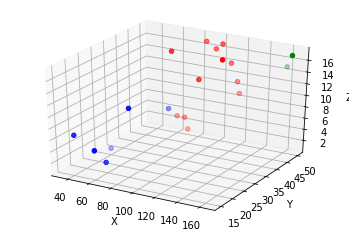

In [8]:
#找出20个数所有3个数的组合
combine=[0,0,0] #初始化
copy_combine=[] #拷贝
total_comb=[]   #包含所有3点组合
for i in range(18):
    combine[0]=i
    for j in range(i+1,19):
        combine[1]=j
        for k in range(j+1,20):
            combine[2]=k
            copy_combine=copy.copy(combine)
            total_comb.append(copy_combine)


times=0 #次数
for comb_idx in total_comb: #遍历每一种初始中心点组合
    cluster_centers=data_list[comb_idx[0]][2:5],data_list[comb_idx[1]][2:5],data_list[comb_idx[2]][2:5]
    result=k_means(data_list,cluster_centers) #计算聚类结果
    if times==0: #保留第一次得到的E和质心作为最佳方案,后面与之做比较
        min_E=result[0]
        best_clusters=[result[1],result[2],result[3]]
        times+=1
    if result[0]<min_E: #选出最小的E
        min_E=result[0]
        best_clusters=[result[1],result[2],result[3]]
print(min_E)
#画出散点图直观观察
set0=[]
set1=[]
set2=[]
total_set=[set0,set1,set2]
for clust_idx in range(0,3): #k_means的返回值中的索引：簇的序号
    for idx in range(2,5): #坐标序号
        for country in best_clusters[clust_idx]:
            total_set[clust_idx].append(country[idx])

ax=plt.subplot(111,projection='3d')
ax.scatter(set0[:len(best_clusters[0])],set0[len(best_clusters[0]):2*len(best_clusters[0])],set0[2*len(best_clusters[0]):],c='b')
ax.scatter(set1[:len(best_clusters[1])],set1[len(best_clusters[1]):2*len(best_clusters[1])],set1[2*len(best_clusters[1]):],c='r')
ax.scatter(set2[:len(best_clusters[2])],set2[len(best_clusters[2]):2*len(best_clusters[2])],set2[2*len(best_clusters[2]):],c='g')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()  

In [ ]:
cluster_centers=[data_list[3][2:5],data_list[5][2:5],data_list[14][2:5]] 
result=k_means(data_list,cluster_centers)
best_clusters=[result[1],result[2],result[3]]
print(best_clusters)

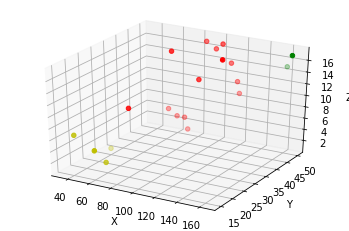

In [7]:
cluster_centers=[data_list[3][2:5],data_list[5][2:5],data_list[14][2:5]]

clusters=k_means(data_list,cluster_centers)
set0=[]
set1=[]
set2=[]
total_set=[set0,set1,set2]
for clust_idx in range(1,4): #k_means的返回值中的索引：簇的序号
    for idx in range(2,5): #坐标序号
        for country in clusters[clust_idx]:
            total_set[clust_idx-1].append(country[idx])
            
            
ax=plt.subplot(111,projection='3d')
ax.scatter(set0[:len(clusters[1])],set0[len(clusters[1]):2*len(clusters[1])],set0[2*len(clusters[1]):],c='y')
ax.scatter(set1[:len(clusters[2])],set1[len(clusters[2]):2*len(clusters[2])],set1[2*len(clusters[2]):],c='r')
ax.scatter(set2[:len(clusters[3])],set2[len(clusters[3]):2*len(clusters[3])],set2[2*len(clusters[3]):],c='g')

ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.savefig("centers is 伊朗,伊拉克,印尼.jpg")
plt.show()  
